In [1306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mpldatacursor import datacursor

In [1307]:
#Load in datasets and check column names
housing_data_1b = pd.read_csv('City_MedianRentalPrice_1Bedroom.csv')
housing_data_2b = pd.read_csv('City_MedianRentalPrice_2Bedroom.csv')
housing_data_3b = pd.read_csv('City_MedianRentalPrice_3Bedroom.csv')
housing_data_1b.columns

Index(['Unnamed: 0', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '2010-02', '2010-03', '2010-04', '2010-05',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=125)

In [1308]:
income_data = pd.read_csv('2015 Median Income by County.csv')
income_data['CountyState'] = income_data['County'] + income_data['State Code']
income_data

,County-State,County,Population,Median household income,State Code,State,CountyState
0,"Autauga County, Alabama",Autauga County,55221,51281.0,AL,Alabama,Autauga CountyAL
1,"Baldwin County, Alabama",Baldwin County,195121,50254.0,AL,Alabama,Baldwin CountyAL
2,"Barbour County, Alabama",Barbour County,26932,32964.0,AL,Alabama,Barbour CountyAL
3,"Bibb County, Alabama",Bibb County,22604,38678.0,AL,Alabama,Bibb CountyAL
4,"Blount County, Alabama",Blount County,57710,45813.0,AL,Alabama,Blount CountyAL
...,...,...,...,...,...,...,...
3215,"Vega Baja Municipio, Puerto Rico",Vega Baja Municipio,56858,16948.0,WY,Wyoming,Vega Baja MunicipioWY
3216,"Vieques Municipio, Puerto Rico",Vieques Municipio,9130,18104.0,WY,Wyoming,Vieques MunicipioWY
3217,"Villalba Municipio, Puerto Rico",Villalba Municipio,24685,17818.0,WY,Wyoming,Villalba MunicipioWY
3218,"Yabucoa Municipio, Puerto Rico",Yabucoa Municipio,36279,15627.0,WY,Wyoming,Yabucoa MunicipioWY


In [1309]:
#Select the necessary columns needed
housing_1b_2019 = housing_data_1b[['RegionName', 'CountyName', 'State','2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']]

housing_2b_2019 = housing_data_2b[['RegionName', 'CountyName', 'State','2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']]

housing_3b_2019 = housing_data_3b[['RegionName', 'CountyName', 'State','2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']]
housing_1b_2019.head(50)

,RegionName,CountyName,State,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,Queens County,NY,2300.0,2300.0,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,Los Angeles County,CA,2362.5,2345.0,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,Harris County,TX,1250.0,1250.0,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,Cook County,IL,1670.0,1675.0,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,Bexar County,TX,952.0,983.0,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5
5,Philadelphia,Philadelphia County,PA,1550.0,1550.0,1550.0,1525.0,1496.0,1500.0,1507.5,1554.0,1495.0,1500.0,1500.0,1470.0
6,Phoenix,Maricopa County,AZ,1033.0,1059.0,1055.0,1115.5,1172.5,1161.0,1129.0,1102.5,1122.0,1100.0,1110.0,1170.0
7,Las Vegas,Clark County,NV,1004.0,1002.0,1002.5,1010.0,1008.0,1026.0,1010.0,1040.0,1029.5,1030.0,1025.0,1028.0
8,San Diego,San Diego County,CA,2020.0,2020.0,1995.0,1990.0,2000.0,2050.0,2100.0,2100.0,2100.0,2049.5,1995.0,2000.0
9,Dallas,Dallas County,TX,1360.0,1398.0,1376.0,1375.0,1375.0,1360.0,1355.0,1330.0,1335.0,1340.0,1330.0,1340.0


In [1310]:
#Melt the dataset to have all the monthly averages into one column.
housing_1b_2019_melted = housing_1b_2019.melt(['RegionName','CountyName','State'], ['2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'])
housing_1b_2019_melted.columns = ['City','County','State Code','Rent Year','1B_Price_2019']

housing_2b_2019_melted = housing_2b_2019.melt(['RegionName','CountyName','State'], ['2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'])
housing_2b_2019_melted.columns = ['City','County','State Code','Rent Year','2B_Price_2019']

housing_3b_2019_melted = housing_3b_2019.melt(['RegionName','CountyName','State'], ['2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'])
housing_3b_2019_melted.columns = ['City','County','State Code','Rent Year','3B_Price_2019']

housing_3b_2019_melted

,City,County,State Code,Rent Year,3B_Price_2019
0,New York,Queens County,NY,2019-01,2600.0
1,Los Angeles,Los Angeles County,CA,2019-01,3600.0
2,Houston,Harris County,TX,2019-01,1595.0
3,Chicago,Cook County,IL,2019-01,1900.0
4,San Antonio,Bexar County,TX,2019-01,1450.0
...,...,...,...,...,...
11875,Siesta Key,Sarasota County,FL,2019-12,5100.0
11876,Glasgow Village,Saint Louis County,MO,2019-12,817.5
11877,Bridgehampton,Suffolk County,NY,2019-12,30000.0
11878,Montauk,Suffolk County,NY,2019-12,21333.0


In [1311]:
housing_1b_2019_melted['CountyState'] = housing_1b_2019_melted['County'] + housing_1b_2019_melted['State Code']
housing_2b_2019_melted['CountyState'] = housing_2b_2019_melted['County'] + housing_2b_2019_melted['State Code']
housing_3b_2019_melted['CountyState'] = housing_3b_2019_melted['County'] + housing_3b_2019_melted['State Code']
housing_3b_2019_melted

,City,County,State Code,Rent Year,3B_Price_2019,CountyState
0,New York,Queens County,NY,2019-01,2600.0,Queens CountyNY
1,Los Angeles,Los Angeles County,CA,2019-01,3600.0,Los Angeles CountyCA
2,Houston,Harris County,TX,2019-01,1595.0,Harris CountyTX
3,Chicago,Cook County,IL,2019-01,1900.0,Cook CountyIL
4,San Antonio,Bexar County,TX,2019-01,1450.0,Bexar CountyTX
...,...,...,...,...,...,...
11875,Siesta Key,Sarasota County,FL,2019-12,5100.0,Sarasota CountyFL
11876,Glasgow Village,Saint Louis County,MO,2019-12,817.5,Saint Louis CountyMO
11877,Bridgehampton,Suffolk County,NY,2019-12,30000.0,Suffolk CountyNY
11878,Montauk,Suffolk County,NY,2019-12,21333.0,Suffolk CountyNY


In [1312]:
#Group all of the monthly prices into 1 value for the year.
rent_1b_2019 = housing_1b_2019_melted.groupby('CountyState', as_index=False).mean()
rent_1b_2019['State Code'] = rent_1b_2019['CountyState'].str.slice(-2)
rent_1b_2019['County'] = rent_1b_2019['CountyState'].str.slice(0,-2)
rent_1b_2019.dropna(inplace=True)
rent_1b_2019

rent_2b_2019 = housing_2b_2019_melted.groupby('CountyState', as_index=False).mean()
rent_2b_2019['State Code'] = rent_2b_2019['CountyState'].str.slice(-2)
rent_2b_2019['County'] = rent_2b_2019['CountyState'].str.slice(0,-2)
rent_2b_2019.dropna(inplace=True)

rent_3b_2019 = housing_3b_2019_melted.groupby('CountyState', as_index=False).mean()
rent_3b_2019['State Code'] = rent_3b_2019['CountyState'].str.slice(-2)
rent_3b_2019['County'] = rent_3b_2019['CountyState'].str.slice(0,-2)
rent_3b_2019.dropna(inplace=True)

rent_3b_2019

,CountyState,3B_Price_2019,State Code,County
0,Ada CountyID,1511.104167,ID,Ada County
1,Adams CountyCO,2030.666667,CO,Adams County
2,Alachua CountyFL,1465.666667,FL,Alachua County
3,Alameda CountyCA,3317.500000,CA,Alameda County
4,Albany CountyNY,1308.125000,NY,Albany County
...,...,...,...,...
407,Yolo CountyCA,2484.791667,CA,Yolo County
408,York CountyPA,1214.895833,PA,York County
409,York CountySC,1451.958333,SC,York County
410,York CountyVA,1471.041667,VA,York County


In [1313]:
housing_1b_2015_melted = housing_data_1b.melt(['RegionName','CountyName','State'], ['2015-01','2015-02','2015-03','2015-04','2015-05',
      '2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])
housing_1b_2015_melted.columns = ['City','County','State Code','Rent Year','1B_Price_2015']
housing_1b_2015_melted['CountyState'] = housing_1b_2015_melted['County'] + housing_1b_2015_melted['State Code']
rent_1b_2015 = housing_1b_2015_melted.groupby('CountyState', as_index=False).mean()
rent_1b_2015['State Code'] = rent_1b_2015['CountyState'].str.slice(-2)
rent_1b_2015['County'] = rent_1b_2015['CountyState'].str.slice(0,-2)

housing_2b_2015_melted = housing_data_2b.melt(['RegionName','CountyName','State'], ['2015-01','2015-02','2015-03','2015-04','2015-05',
      '2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])
housing_2b_2015_melted.columns = ['City','County','State Code','Rent Year','2B_Price_2015']
housing_2b_2015_melted['CountyState'] = housing_2b_2015_melted['County'] + housing_2b_2015_melted['State Code']
rent_2b_2015 = housing_2b_2015_melted.groupby('CountyState', as_index=False).mean()
rent_2b_2015['State Code'] = rent_2b_2015['CountyState'].str.slice(-2)
rent_2b_2015['County'] = rent_2b_2015['CountyState'].str.slice(0,-2)

housing_3b_2015_melted = housing_data_3b.melt(['RegionName','CountyName','State'], ['2015-01','2015-02','2015-03','2015-04','2015-05',
      '2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])
housing_3b_2015_melted.columns = ['City','County','State Code','Rent Year','3B_Price_2015']
housing_3b_2015_melted['CountyState'] = housing_3b_2015_melted['County'] + housing_3b_2015_melted['State Code']
rent_3b_2015 = housing_3b_2015_melted.groupby('CountyState', as_index=False).mean()
rent_3b_2015['State Code'] = rent_3b_2015['CountyState'].str.slice(-2)
rent_3b_2015['County'] = rent_3b_2015['CountyState'].str.slice(0,-2)

rent_1b_2015

,CountyState,1B_Price_2015,State Code,County
0,Ada CountyID,635.416667,ID,Ada County
1,Adams CountyCO,1115.269231,CO,Adams County
2,Alachua CountyFL,NaN,FL,Alachua County
3,Alameda CountyCA,2134.476190,CA,Alameda County
4,Albany CountyNY,NaN,NY,Albany County
...,...,...,...,...
324,Yakima CountyWA,NaN,WA,Yakima County
325,Yellowstone CountyMT,579.375000,MT,Yellowstone County
326,Yolo CountyCA,NaN,CA,Yolo County
327,York CountyPA,NaN,PA,York County


In [1314]:
merge_1b = pd.merge(rent_1b_2019, rent_1b_2015)
merge_2b = pd.merge(rent_2b_2019, rent_2b_2015)
merge_3b = pd.merge(rent_3b_2019, rent_3b_2015)

merge_1b

,CountyState,1B_Price_2019,State Code,County,1B_Price_2015
0,Ada CountyID,1041.500000,ID,Ada County,635.416667
1,Adams CountyCO,1336.638889,CO,Adams County,1115.269231
2,Alachua CountyFL,1033.125000,FL,Alachua County,NaN
3,Alameda CountyCA,2358.350000,CA,Alameda County,2134.476190
4,Albany CountyNY,1171.875000,NY,Albany County,NaN
...,...,...,...,...,...
324,Yakima CountyWA,640.833333,WA,Yakima County,NaN
325,Yellowstone CountyMT,692.500000,MT,Yellowstone County,579.375000
326,Yolo CountyCA,1471.625000,CA,Yolo County,NaN
327,York CountyPA,710.500000,PA,York County,NaN


In [1315]:
price_ols_1b = ols('Q("1B_Price_2015") ~ Q("1B_Price_2019")', merge_1b).fit()
price_ols_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("1B_Price_2015")   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1321.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.41e-65
Time:                        11:28:21   Log-Likelihood:                -757.08
No. Observations:                 119   AIC:                             1518.
Df Residuals:                     117   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -106.9241     37.623     -2.842      0.005    -181.435     -32.413
Q("1B_Price_2019")     0.9412      0.026     36.343      0.000       0.890       0.992
==============================================================================
Omnibus:                        2.836   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.490
Skew:                           0.174   Prob(JB):                        0.288
Kurtosis:                       3.617   Cond. No.                     4.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1316]:
price_ols_2b = ols('Q("2B_Price_2015") ~ Q("2B_Price_2019")', merge_2b).fit()
price_ols_2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("2B_Price_2015")   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     2078.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          1.36e-108
Time:                        11:28:21   Log-Likelihood:                -1343.2
No. Observations:                 205   AIC:                             2690.
Df Residuals:                     203   BIC:                             2697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -72.8437     29.981     -2.430      0.016    -131.958     -13.729
Q("2B_Price_2019")     0.9062      0.020     45.583      0.000       0.867       0.945
==============================================================================
Omnibus:                       32.548   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.623
Skew:                           0.384   Prob(JB):                     5.40e-38
Kurtosis:                       7.416   Cond. No.                     3.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1317]:
price_ols_3b = ols('Q("3B_Price_2015") ~ Q("3B_Price_2019")', merge_3b).fit()
price_ols_3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("3B_Price_2015")   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1977.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          1.64e-112
Time:                        11:28:21   Log-Likelihood:                -1497.1
No. Observations:                 224   AIC:                             2998.
Df Residuals:                     222   BIC:                             3005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -36.2716     35.437     -1.024      0.307    -106.108      33.565
Q("3B_Price_2019")     0.8958      0.020     44.461      0.000       0.856       0.935
==============================================================================
Omnibus:                       40.618   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.159
Skew:                          -0.212   Prob(JB):                     6.28e-84
Kurtosis:                       9.393   Cond. No.                     4.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1318]:
merge_1b['1B_Price_2015'].fillna(merge_1b['1B_Price_2019'] * 0.9412, inplace=True)
merge_2b['2B_Price_2015'].fillna(merge_2b['2B_Price_2019'] * 0.9062, inplace=True)
merge_3b['3B_Price_2015'].fillna(merge_3b['3B_Price_2019'] * 0.8958, inplace=True)
merge_3b.drop([364], inplace=True)
merge_3b.sort_values('3B_Price_2019')

,CountyState,3B_Price_2019,State Code,County,3B_Price_2015
228,McLean CountyIL,502.500000,IL,McLean County,450.139500
219,Mahoning CountyOH,655.208333,OH,Mahoning County,586.935625
137,Genesee CountyMI,724.583333,MI,Genesee County,595.833333
359,Stark CountyOH,744.791667,OH,Stark County,667.184375
102,Dougherty CountyGA,754.208333,GA,Dougherty County,605.416667
...,...,...,...,...,...
212,Los Angeles CountyCA,3875.665278,CA,Los Angeles County,2536.746212
222,Marin CountyCA,3932.916667,CA,Marin County,3523.106750
335,Santa Clara CountyCA,4210.442708,CA,Santa Clara County,4032.900000
331,San Mateo CountyCA,4742.770833,CA,San Mateo County,4248.574112


In [1319]:
merged_data_1 = pd.merge(income_data, merge_1b, on='CountyState')
merged_data_1.drop(['County_y','State Code_y', '1B_Price_2019'], axis=1, inplace=True)
merged_data_1.columns = ['County-State','County','Population','Median_household_income',
                       'State Code','State', 'CountyState','1B_Price']

merged_data_2 = pd.merge(income_data, merge_2b, on='CountyState')
merged_data_2.drop(['County_y','State Code_y', '2B_Price_2019'], axis=1, inplace=True)
merged_data_2.columns = ['County-State','County','Population','Median_household_income',
                       'State Code','State', 'CountyState','2B_Price']

merged_data_3 = pd.merge(income_data, merge_3b, on='CountyState')
merged_data_3.drop(['County_y','State Code_y', '3B_Price_2019'], axis=1, inplace=True)
merged_data_3.columns = ['County-State','County','Population','Median_household_income',
                       'State Code','State', 'CountyState','3B_Price']


merged_data_1['1B_Price'] = 12*merged_data_1['1B_Price']
merged_data_1['1B_Price/Income_Ratio'] =  merged_data_1['1B_Price'] / merged_data_1['Median_household_income']
merged_data_1

merged_data_2['2B_Price'] = 12 * merged_data_2['2B_Price']
merged_data_2['2B_Price/Income_Ratio'] = merged_data_2['2B_Price'] / merged_data_2['Median_household_income']
merged_data_2

merged_data_3['3B_Price'] = 12 * merged_data_3['3B_Price']
merged_data_3['3B_Price/Income_Ratio'] = merged_data_3['3B_Price'] / merged_data_3['Median_household_income']
merged_data_3

,County-State,County,Population,Median_household_income,State Code,State,CountyState,3B_Price,3B_Price/Income_Ratio
0,"Baldwin County, Alabama",Baldwin County,195121,50254.0,AL,Alabama,Baldwin CountyAL,15444.1892,0.307323
1,"Jefferson County, Alabama",Jefferson County,659026,45610.0,AL,Alabama,Jefferson CountyAL,9290.0000,0.203683
2,"Lee County, Alabama",Lee County,150982,44570.0,AL,Alabama,Lee CountyAL,13819.9545,0.310073
3,"Mobile County, Alabama",Mobile County,414251,43809.0,AL,Alabama,Mobile CountyAL,10928.0000,0.249446
4,"Montgomery County, Alabama",Montgomery County,228138,44369.0,AL,Alabama,Montgomery CountyAL,10621.5000,0.239390
...,...,...,...,...,...,...,...,...,...
379,"Dane County, Wisconsin",Dane County,510198,62865.0,WI,Wisconsin,Dane CountyWI,18850.0000,0.299849
380,"Kenosha County, Wisconsin",Kenosha County,167738,54918.0,WI,Wisconsin,Kenosha CountyWI,13331.7435,0.242757
381,"Milwaukee County, Wisconsin",Milwaukee County,955939,43873.0,WI,Wisconsin,Milwaukee CountyWI,10994.0000,0.250587
382,"Winnebago County, Wisconsin",Winnebago County,169004,52018.0,WI,Wisconsin,Winnebago CountyWI,10371.1245,0.199376


In [1320]:
merged_df = pd.merge(merged_data_1, merged_data_2, on='CountyState', how='outer')

merged_df['County-State_y'].fillna(merged_df['County-State_x'], inplace=True)
merged_df['County_y'].fillna(merged_df.County_x, inplace=True)
merged_df['Population_y'].fillna(merged_df.Population_x, inplace=True)
merged_df['Median_household_income_y'].fillna(merged_df['Median_household_income_x'], inplace=True)
merged_df['State Code_y'].fillna(merged_df['State Code_x'], inplace=True)
merged_df['State_y'].fillna(merged_df['State_x'], inplace=True)
merged_df['1B_Price'].fillna(merged_df['2B_Price'] * 0.7235, inplace=True)
merged_df.drop(['State Code_x','State_x','Population_x','County-State_x',
               'County_x','Median_household_income_x'], axis=1, inplace=True)
merged_df.columns = ['CountyState', '1B_Price','1B_Price/Income_Ratio','County-State','County','Population',
                  'Median_household_income','State Code','State','2B_Price','2B_Price/Income_Ratio']
merged_df_1b2b = merged_df[['County-State','County', 'State Code', 'Population', '1B_Price', 
                           '1B_Price/Income_Ratio', '2B_Price', '2B_Price/Income_Ratio']]
merged_df_1b2b

,County-State,County,State Code,Population,1B_Price,1B_Price/Income_Ratio,2B_Price,2B_Price/Income_Ratio
0,"Jefferson County, Alabama",Jefferson County,AL,659026.0,9407.294000,0.206255,10275.5000,0.225291
1,"Montgomery County, Alabama",Montgomery County,AL,228138.0,6863.230400,0.154685,8259.1068,0.186146
2,"Tuscaloosa County, Alabama",Tuscaloosa County,AL,200458.0,7932.433600,0.170352,9289.9093,0.199504
3,"Maricopa County, Arizona",Maricopa County,AZ,4018143.0,9327.729730,0.172006,12772.3750,0.235527
4,"Pima County, Arizona",Pima County,AZ,998537.0,6424.000000,0.139162,8304.0000,0.179888
...,...,...,...,...,...,...,...,...
451,"Eau Claire County, Wisconsin",Eau Claire County,WI,101281.0,6364.255740,NaN,8796.4834,0.177660
452,"La Crosse County, Wisconsin",La Crosse County,WI,117048.0,6461.289824,NaN,8930.6010,0.176707
453,"Racine County, Wisconsin",Racine County,WI,194895.0,6154.780134,NaN,8506.9525,0.153047
454,"Winnebago County, Wisconsin",Winnebago County,WI,169004.0,5723.699661,NaN,7911.1260,0.152084


In [1321]:
merged_all = pd.merge(merged_df, merged_data_3, on='CountyState', how='outer')
merged_all['County-State_y'].fillna(merged_all['County-State_x'], inplace=True)
merged_all['County_y'].fillna(merged_all.County_x, inplace=True)
merged_all['Population_y'].fillna(merged_all.Population_x, inplace=True)
merged_all['Median_household_income_y'].fillna(merged_all['Median_household_income_x'], inplace=True)
merged_all['State Code_y'].fillna(merged_all['State Code_x'], inplace=True)
merged_all['State_y'].fillna(merged_all['State_x'], inplace=True)
merged_all['1B_Price/Income_Ratio'].fillna(merged_all['1B_Price'] / merged_all['Median_household_income_y'], inplace=True)
merged_all['2B_Price/Income_Ratio'].fillna(merged_all['2B_Price'] / merged_all['Median_household_income_y'], inplace=True)
merged_all['3B_Price/Income_Ratio'].fillna(merged_all['3B_Price'] / merged_all['Median_household_income_y'] , inplace=True)

merged_all.drop(['State Code_x','State_x','Population_x','County-State_x','County_x','Median_household_income_x'], axis=1, inplace=True)
merged_all.columns = ['CountyState', '1B_Price','1B_Price/Income_Ratio','2B_Price','2B_Price/Income_Ratio',
                      'County-State','County','Population','Median_household_income','State Code','State', '3B_Price', 
                     '3B_Price/Income_Ratio']
merged_all

,CountyState,1B_Price,1B_Price/Income_Ratio,2B_Price,2B_Price/Income_Ratio,County-State,County,Population,Median_household_income,State Code,State,3B_Price,3B_Price/Income_Ratio
0,Jefferson CountyAL,9407.29400,0.206255,10275.5000,0.225291,"Jefferson County, Alabama",Jefferson County,659026.0,45610.0,AL,Alabama,9290.0000,0.203683
1,Montgomery CountyAL,6863.23040,0.154685,8259.1068,0.186146,"Montgomery County, Alabama",Montgomery County,228138.0,44369.0,AL,Alabama,10621.5000,0.239390
2,Tuscaloosa CountyAL,7932.43360,0.170352,9289.9093,0.199504,"Tuscaloosa County, Alabama",Tuscaloosa County,200458.0,46565.0,AL,Alabama,NaN,NaN
3,Maricopa CountyAZ,9327.72973,0.172006,12772.3750,0.235527,"Maricopa County, Arizona",Maricopa County,4018143.0,54229.0,AZ,Arizona,16022.8000,0.295466
4,Pima CountyAZ,6424.00000,0.139162,8304.0000,0.179888,"Pima County, Arizona",Pima County,998537.0,46162.0,AZ,Arizona,11386.0000,0.246653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Rockwall CountyTX,NaN,NaN,NaN,NaN,"Rockwall County, Texas",Rockwall County,85536.0,87524.0,TX,Texas,20603.8479,0.235408
492,Smith CountyTX,NaN,NaN,NaN,NaN,"Smith County, Texas",Smith County,217552.0,46929.0,TX,Texas,14229.3351,0.303210
493,Franklin CountyWA,NaN,NaN,NaN,NaN,"Franklin County, Washington",Franklin County,86443.0,56980.0,WA,Washington,15499.5795,0.272018
494,Berkeley CountyWV,NaN,NaN,NaN,NaN,"Berkeley County, West Virginia",Berkeley County,108724.0,55239.0,WV,West Virginia,13395.3453,0.242498


In [1322]:
price_ols_1b2b = ols('Q("1B_Price") ~ Q("2B_Price")', merged_all).fit()
price_ols_1b2b.summary()
#Check for correlation and get coefficients to fill NaN values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("1B_Price")   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     3303.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          6.35e-210
Time:                        11:28:21   Log-Likelihood:                -4023.7
No. Observations:                 454   AIC:                             8051.
Df Residuals:                     452   BIC:                             8060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       762.6430    193.168      3.948      0.000     383.025    1142.261
Q("2B_Price")     0.7660      0.013     57.471      0.000       0.740       0.792
==============================================================================
Omnibus:                       82.070   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1308.046
Skew:                           0.011   Prob(JB):                    9.15e-285
Kurtosis:                      11.315   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1323]:
price_ols_2b3b = ols('Q("2B_Price") ~ Q("3B_Price")', merged_all).fit()
price_ols_2b3b.summary()
#Checking for correlation and getting coefficients to fill NaN values.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("2B_Price")   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1997.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          7.49e-145
Time:                        11:28:21   Log-Likelihood:                -3161.6
No. Observations:                 344   AIC:                             6327.
Df Residuals:                     342   BIC:                             6335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       388.1549    323.196      1.201      0.231    -247.547    1023.857
Q("3B_Price")     0.7886      0.018     44.691      0.000       0.754       0.823
==============================================================================
Omnibus:                      260.593   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6827.390
Skew:                           2.817   Prob(JB):                         0.00
Kurtosis:                      24.085   Cond. No.                     4.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1324]:
#Fill NaN values of corresponding 
merged_all['3B_Price'].fillna(merged_all['2B_Price'] / 0.7886, inplace=True)
merged_all['2B_Price'].fillna(merged_all['3B_Price'] * 0.7886, inplace=True)
merged_all['1B_Price'].fillna(merged_all['2B_Price'] * 0.7235, inplace=True)
merged_all['2B_Price'].isna().value_counts()

False    494
True       2
Name: 2B_Price, dtype: int64

In [1325]:
df_all = merged_all[['County-State', 'County','State Code','State', 'Population','Median_household_income', '1B_Price',
                     '1B_Price/Income_Ratio', '2B_Price','2B_Price/Income_Ratio', '3B_Price', '3B_Price/Income_Ratio']]
df_all['2B_Price'].fillna(df_all['1B_Price'] / 0.7717, inplace=True)
df_all['3B_Price'].fillna(df_all['2B_Price'] / 0.7925, inplace=True)
df_all['1B_Price/Income_Ratio'].fillna(df_all['1B_Price'] / df_all['Median_household_income'], inplace=True)
df_all['2B_Price/Income_Ratio'].fillna(df_all['2B_Price'] / df_all['Median_household_income'], inplace=True)
df_all['3B_Price/Income_Ratio'].fillna(df_all['3B_Price'] / df_all['Median_household_income'], inplace=True)

df_all

,County-State,County,State Code,State,Population,Median_household_income,1B_Price,1B_Price/Income_Ratio,2B_Price,2B_Price/Income_Ratio,3B_Price,3B_Price/Income_Ratio
0,"Jefferson County, Alabama",Jefferson County,AL,Alabama,659026.0,45610.0,9407.294000,0.206255,10275.500000,0.225291,9290.000000,0.203683
1,"Montgomery County, Alabama",Montgomery County,AL,Alabama,228138.0,44369.0,6863.230400,0.154685,8259.106800,0.186146,10621.500000,0.239390
2,"Tuscaloosa County, Alabama",Tuscaloosa County,AL,Alabama,200458.0,46565.0,7932.433600,0.170352,9289.909300,0.199504,11780.255262,0.252985
3,"Maricopa County, Arizona",Maricopa County,AZ,Arizona,4018143.0,54229.0,9327.729730,0.172006,12772.375000,0.235527,16022.800000,0.295466
4,"Pima County, Arizona",Pima County,AZ,Arizona,998537.0,46162.0,6424.000000,0.139162,8304.000000,0.179888,11386.000000,0.246653
...,...,...,...,...,...,...,...,...,...,...,...,...
491,"Rockwall County, Texas",Rockwall County,TX,Texas,85536.0,87524.0,11755.568687,0.134313,16248.194454,0.185643,20603.847900,0.235408
492,"Smith County, Texas",Smith County,TX,Texas,217552.0,46929.0,8118.577023,0.172997,11221.253660,0.239111,14229.335100,0.303210
493,"Franklin County, Washington",Franklin County,WA,Washington,86443.0,56980.0,8843.317633,0.155200,12222.968394,0.214513,15499.579500,0.272018
494,"Berkeley County, West Virginia",Berkeley County,WV,West Virginia,108724.0,55239.0,7642.742391,0.138358,10563.569304,0.191234,13395.345300,0.242498


In [1326]:
df_all['State Code_cat'] = df_all['State Code'].astype('category')
df_all['State Code_cat'] = df_all['State Code_cat'].cat.codes
df_all

,County-State,County,State Code,State,Population,Median_household_income,1B_Price,1B_Price/Income_Ratio,2B_Price,2B_Price/Income_Ratio,3B_Price,3B_Price/Income_Ratio,State Code_cat
0,"Jefferson County, Alabama",Jefferson County,AL,Alabama,659026.0,45610.0,9407.294000,0.206255,10275.500000,0.225291,9290.000000,0.203683,1
1,"Montgomery County, Alabama",Montgomery County,AL,Alabama,228138.0,44369.0,6863.230400,0.154685,8259.106800,0.186146,10621.500000,0.239390,1
2,"Tuscaloosa County, Alabama",Tuscaloosa County,AL,Alabama,200458.0,46565.0,7932.433600,0.170352,9289.909300,0.199504,11780.255262,0.252985,1
3,"Maricopa County, Arizona",Maricopa County,AZ,Arizona,4018143.0,54229.0,9327.729730,0.172006,12772.375000,0.235527,16022.800000,0.295466,3
4,"Pima County, Arizona",Pima County,AZ,Arizona,998537.0,46162.0,6424.000000,0.139162,8304.000000,0.179888,11386.000000,0.246653,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,"Rockwall County, Texas",Rockwall County,TX,Texas,85536.0,87524.0,11755.568687,0.134313,16248.194454,0.185643,20603.847900,0.235408,43
492,"Smith County, Texas",Smith County,TX,Texas,217552.0,46929.0,8118.577023,0.172997,11221.253660,0.239111,14229.335100,0.303210,43
493,"Franklin County, Washington",Franklin County,WA,Washington,86443.0,56980.0,8843.317633,0.155200,12222.968394,0.214513,15499.579500,0.272018,47
494,"Berkeley County, West Virginia",Berkeley County,WV,West Virginia,108724.0,55239.0,7642.742391,0.138358,10563.569304,0.191234,13395.345300,0.242498,49


In [1327]:
df_all['1B_Price/Income_Ratio'].isna().value_counts()

False    496
Name: 1B_Price/Income_Ratio, dtype: int64

In [1328]:
df_all.groupby('County-State')['1B_Price/Income_Ratio'].mean().sort_values(ascending=False)

County-State
San Francisco County, California    0.517221
Queens County, New York             0.472453
Suffolk County, Massachusetts       0.458542
Miami-Dade County, Florida          0.444621
Orleans Parish, Louisiana           0.431616
                                      ...   
Johnson County, Missouri            0.093180
Allen County, Indiana               0.090751
Coryell County, Texas               0.090472
Hardin County, Kentucky             0.088275
Cole County, Missouri               0.076014
Name: 1B_Price/Income_Ratio, Length: 496, dtype: float64

In [1329]:
df_all.groupby('State')['1B_Price/Income_Ratio'].mean().sort_values(ascending=False)

State
District of Columbia    0.362149
Hawaii                  0.307044
California              0.274959
Rhode Island            0.254469
Massachusetts           0.248780
Florida                 0.241942
Oregon                  0.232806
Vermont                 0.229582
New Jersey              0.228456
Maine                   0.224558
Nevada                  0.218999
New York                0.212175
South Carolina          0.209192
Colorado                0.207024
Louisiana               0.198391
Delaware                0.193794
Washington              0.189306
North Carolina          0.187100
Pennsylvania            0.185069
Michigan                0.183870
Tennessee               0.183706
Arizona                 0.175413
Minnesota               0.174156
Connecticut             0.171756
Texas                   0.171636
Georgia                 0.168043
Mississippi             0.166895
Utah                    0.166674
South Dakota            0.165205
Alabama                 0.164581
Virg

In [1330]:
price_ols_MHIP = ols('Q("1B_Price") ~ Q("Median_household_income") + Q("Population")', df_all).fit()
price_ols_MHIP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("1B_Price")   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     219.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           7.50e-69
Time:                        11:28:22   Log-Likelihood:                -4750.9
No. Observations:                 496   AIC:                             9508.
Df Residuals:                     493   BIC:                             9520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -950.7516    628.236     -1.513      0.131   -2185.103     283.599
Q("Median_household_income")     0.1868      0.011     17.333      0.000       0.166       0.208
Q("Population")                  0.0022      0.000      9.596      0.000       0.002       0.003
==============================================================================
Omnibus:                      210.768   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.643
Skew:                           1.739   Prob(JB):                    1.02e-287
Kurtosis:                      10.201   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1331]:
price_ols = ols('Q("2B_Price") ~ Q("Median_household_income") +Q("Population")', df_all).fit()
price_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("2B_Price")   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     215.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           5.57e-68
Time:                        11:28:22   Log-Likelihood:                -4849.7
No. Observations:                 496   AIC:                             9705.
Df Residuals:                     493   BIC:                             9718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1372.8416    766.770     -1.790      0.074   -2879.381     133.698
Q("Median_household_income")     0.2352      0.013     17.877      0.000       0.209       0.261
Q("Population")                  0.0023      0.000      8.344      0.000       0.002       0.003
==============================================================================
Omnibus:                      341.858   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5523.333
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      18.371   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1332]:
price_ols_2 = ols('Q("3B_Price") ~ Q("Median_household_income") +Q("Population")', df_all).fit()
price_ols_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("3B_Price")   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     195.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.86e-63
Time:                        11:28:22   Log-Likelihood:                -4945.7
No. Observations:                 496   AIC:                             9897.
Df Residuals:                     493   BIC:                             9910.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -652.0980    930.444     -0.701      0.484   -2480.222    1176.026
Q("Median_household_income")     0.2764      0.016     17.316      0.000       0.245       0.308
Q("Population")                  0.0025      0.000      7.423      0.000       0.002       0.003
==============================================================================
Omnibus:                      342.179   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6249.951
Skew:                           2.735   Prob(JB):                         0.00
Kurtosis:                      19.507   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The null hypothesis: Bedroom rent prices and income are not correlated with one another

The alternate hypothesis: Bedroom rent prices and income are correlated with one another


In [1333]:
import scipy.stats

x = df_all['1B_Price']
y = df_all['Median_household_income']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))
    

Correlation coefficient: 0.6098612835459234
We reject the null hypothesis since the p value 7.516464879985773e-52 is less than 0.05


In [1334]:
x = df_all['2B_Price']
y = df_all['Median_household_income']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))
    

Correlation coefficient: 0.6253940826978927
We reject the null hypothesis since the p value 3.4441130098396656e-55 is less than 0.05


In [1335]:
x = df_all['3B_Price']
y = df_all['Median_household_income']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))
    

Correlation coefficient: 0.6165637448984544
We reject the null hypothesis since the p value 2.8714868419407013e-53 is less than 0.05


In [1336]:
#Null hypothesis: 1 bedroom rent prices and population are not correlated with one another.
#Alternate hypothesis: 1 bedroom rent prices and population are correlated with one another.
x = df_all['1B_Price']
y = df_all['Population']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))

Correlation coefficient: 0.3850576074031864
We reject the null hypothesis since the p value 5.611763290946513e-19 is less than 0.05


In [1337]:
#Null hypothesis: 2 bedroom rent prices and population are not correlated with one another.
#Alternate hypothesis: 2 bedroom rent prices and population are correlated with one another.
x = df_all['2B_Price']
y = df_all['Population']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))

Correlation coefficient: 0.34728191518822593
We reject the null hypothesis since the p value 1.6652812648546247e-15 is less than 0.05


In [1338]:
#Null hypothesis: 3 bedroom rent prices and population are not correlated with one another.
#Alternate hypothesis: 3 bedroom rent prices and population are correlated with one another.
x = df_all['3B_Price']
y = df_all['Population']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))

Correlation coefficient: 0.32153429313807824
We reject the null hypothesis since the p value 2.1582735903810403e-13 is less than 0.05


Text(0.5, 1.0, '3B Price to Median household income')

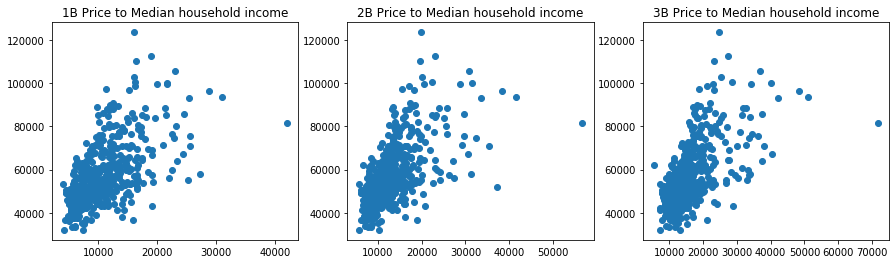

In [1339]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
ax1.scatter(df_all['1B_Price'], df_all['Median_household_income'])
ax1.set_title('1B Price to Median household income')

ax2.scatter(df_all['2B_Price'], df_all['Median_household_income'])
ax2.set_title('2B Price to Median household income')

ax3.scatter(df_all['3B_Price'], df_all['Median_household_income'])
ax3.set_title('3B Price to Median household income')

Text(0.5, 1.0, '3B Price to Population')

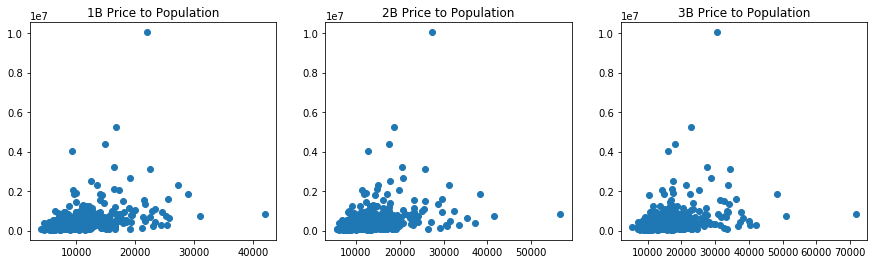

In [1340]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
ax1.scatter(df_all['1B_Price'], df_all['Population'])
ax1.set_title('1B Price to Population')

ax2.scatter(df_all['2B_Price'], df_all['Population'])
ax2.set_title('2B Price to Population')

ax3.scatter(df_all['3B_Price'], df_all['Population'])
ax3.set_title('3B Price to Population')

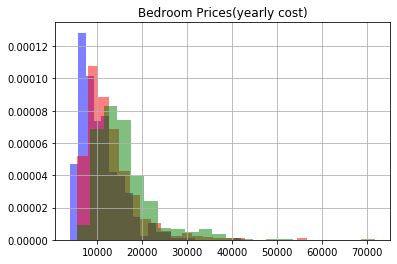

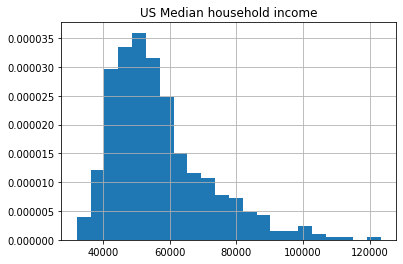

Text(0.5, 1.0, 'Population sizes in counties')

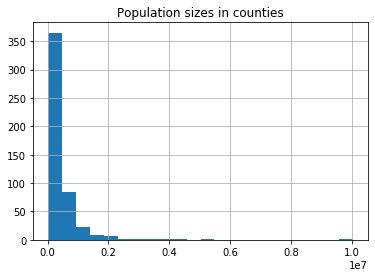

In [1341]:
price_bins = int(np.sqrt(len(df_all['1B_Price'])))

one_bedroom = df_all['1B_Price'].hist(alpha=0.5, color='blue', density=True, bins=price_bins)
two_bedroom = df_all['2B_Price'].hist(alpha=0.5, color='red', density=True, bins=price_bins)
three_bedroom = df_all['3B_Price'].hist(alpha=0.5, color='green', density=True, bins=price_bins)
plt.title("Bedroom Prices(yearly cost)")
plt.show()


inc_bins = int(np.sqrt(len(df_all['Median_household_income'])))
df_all['Median_household_income'].hist(density=True,bins=inc_bins)
plt.title('US Median household income')
plt.show()

pop_bins = int(np.sqrt(len(df_all['Population'])))
df_all['Population'].hist(bins=pop_bins)
plt.title('Population sizes in counties')

In [1342]:
#Checking for normal distribution...
#Null hypothesis: The data is normally distributed
#Alternate hypothesis: The data is not normally distributed
chi_1b, p_1b = scipy.stats.chisquare(df_all['1B_Price'])
chi_2b, p_2b = scipy.stats.chisquare(df_all['2B_Price'])
chi_3b, p_3b = scipy.stats.chisquare(df_all['3B_Price'])
chi_income, p_income = scipy.stats.chisquare(df_all['Median_household_income'])
chi_pop, p_pop = scipy.stats.chisquare(df_all['Population'])

print(p_1b, p_2b, p_3b, p_income, p_pop) #We fail to reject the null hypothesis, thus the data is not normally distributed


0.0 0.0 0.0 0.0 0.0


In [1343]:
#sm.qqplot(df_all['1B_Price'])
log_1b = np.log(df_all['1B_Price'])
log_2b = np.log(df_all['2B_Price'])
log_3b = np.log(df_all['3B_Price'])
log_inc = np.log(df_all['Median_household_income'])
log_pop = np.log(df_all['Population'])
#sm.qqplot(log_1b)
chi_log1b, p_log_1b = scipy.stats.chisquare(log_1b)
chi_log2b, p_log_2b = scipy.stats.chisquare(log_2b)
chi_log3b, p_log_3b = scipy.stats.chisquare(log_3b)
chi_log_inc, p_log_inc = scipy.stats.chisquare(log_inc)
chi_log_pop, p_log_pop = scipy.stats.chisquare(log_pop)



print(p_log_1b, p_log_2b, p_log_3b, p_log_inc, p_log_pop)

#When converted into log, the data becomes normally distributed.

1.0 1.0 1.0 1.0 1.0


In [1344]:
from scipy.stats import norm
from scipy.stats import t, ttest_ind_from_stats

critical_1b = t.ppf(.95, df=len(df_all['1B_Price']))
critical_2b = t.ppf(.95, df=len(df_all['2B_Price']))
critical_3b = t.ppf(.95, df=len(df_all['3B_Price']))

margin_of_error_1b = critical_1b * np.std(df_all['1B_Price']) / np.sqrt(len(df_all['1B_Price']))
margin_of_error_2b = critical_2b * np.std(df_all['2B_Price']) / np.sqrt(len(df_all['2B_Price']))
margin_of_error_3b = critical_3b * np.std(df_all['3B_Price']) / np.sqrt(len(df_all['3B_Price']))

print(np.mean(df_all['1B_Price']), np.mean(df_all['1B_Price']) + margin_of_error_1b)
print(np.mean(df_all['2B_Price']), np.mean(df_all['2B_Price']) + margin_of_error_2b)
print(np.mean(df_all['3B_Price']), np.mean(df_all['3B_Price']) + margin_of_error_3b)


10621.55360426306 10977.179674241377
13003.491448397432 13435.775814998819
16147.043235591673 16660.187192648584


Text(0, 0.5, 'US Dollars')

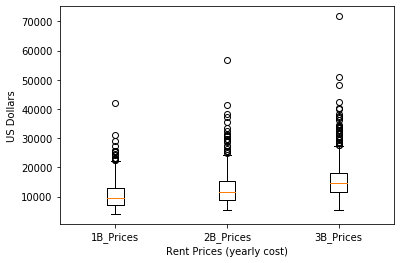

In [1345]:
plt.boxplot(df_all['1B_Price'], positions=[1])
plt.boxplot(df_all['2B_Price'], positions=[2])
plt.boxplot(df_all['3B_Price'], positions=[3])
plt.xticks([1,2,3], ['1B_Prices', '2B_Prices', '3B_Prices'])
plt.xlabel('Rent Prices (yearly cost)')
plt.ylabel('US Dollars')

Text(0.5, 1.0, '2015 3B Price vs 2019 3B Price')

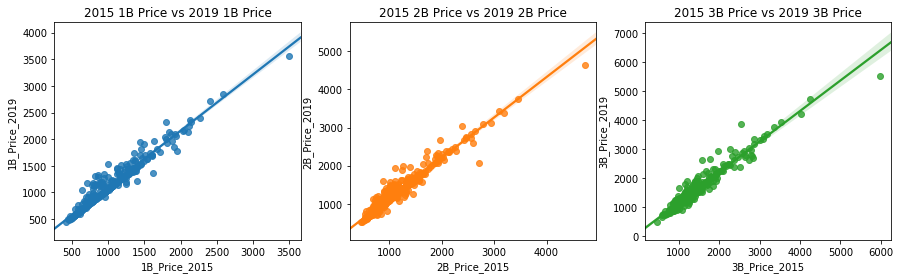

In [1346]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
sns.regplot(merge_1b['1B_Price_2015'], merge_1b['1B_Price_2019'], ax=ax1)
ax1.set_title('2015 1B Price vs 2019 1B Price')

sns.regplot(merge_2b['2B_Price_2015'], merge_2b['2B_Price_2019'], ax=ax2)
ax2.set_title('2015 2B Price vs 2019 2B Price')

sns.regplot(merge_3b['3B_Price_2015'], merge_3b['3B_Price_2019'], ax=ax3)
ax3.set_title('2015 3B Price vs 2019 3B Price')


Text(0.5, 1.0, '2B Price vs 3B Price')

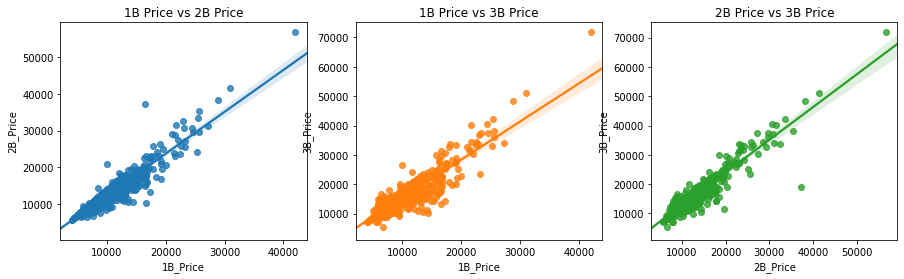

In [1347]:
#sns.regplot('1B_Price','2B_Price', data=df_all, fit_reg = True)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
#ax1.scatter(merge_1b['1B_Price_2015'], merge_1b['1B_Price_2019'])
sns.regplot(df_all['1B_Price'], df_all['2B_Price'], ax=ax1)
ax1.set_title('1B Price vs 2B Price')

sns.regplot(df_all['1B_Price'], df_all['3B_Price'], ax=ax2)
ax2.set_title('1B Price vs 3B Price')

sns.regplot(df_all['2B_Price'], df_all['3B_Price'], ax=ax3)
ax3.set_title('2B Price vs 3B Price')

In [1348]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
reg = LinearRegression()
X = df_all[['State Code_cat', 'Median_household_income','Population']]
#X = df_all[['Median_household_income', 'Population']]
y = df_all[['1B_Price','2B_Price','3B_Price']]

#y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

reg.fit(X_train, y_train)
print('R^2 score: ' + str(reg.score(X_test, y_test)))

cv_scores = cross_val_score(reg, X, y, cv=5)
print('Cross validation score: ' + str(np.mean(cv_scores)))

R^2 score: 0.26114562303727634
Cross validation score: 0.26769549881951094


In [1349]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
result = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result.append(mean_absolute_error(y_test, y_pred))
print(model.score(X_test, y_test))
print('Mean Absolute Error: {}'.format(np.mean(result)))
#cv_scores_2 = cross_val_score(model, X, y, cv=10)
#print('Cross validation score: ' + str(np.mean(cv_scores_2)))


0.1499782943853835
Mean Absolute Error: 2545.414666115432


In [1350]:
parameters = {'max_depth': list(range(1,20)),
              'n_estimators': list(range(1,20)),
              'max_features': list(range(1,3))
                            
}
regressor = RandomForestRegressor()
model_cv = GridSearchCV(regressor, parameters, cv=3)
model_cv.fit(X_train, y_train)
print('Tuned Random Forest Regressor Parameters: {}'.format(model_cv.best_params_))
print('Best score is {}'.format(model_cv.best_score_))

Tuned Random Forest Regressor Parameters: {'max_depth': 7, 'max_features': 1, 'n_estimators': 18}
Best score is 0.5588587564224368


In [1351]:
print('R^2: {}'.format(model_cv.score(X_test, y_test)))
y_pred_cv = model_cv.predict(X_test)
mae= mean_absolute_error(y_test, y_pred_cv)
print('Mean Absolute Error: {}'.format(mae))

R^2: 0.5352073826241069
Mean Absolute Error: 2287.140429461093
